# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    mean_absolute_percentage_error
)

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [2]:
data = pd.read_csv('set50_dataset.csv')

data

,Date,Open_0,STD5_Open_0,RSI14_Open_0,ATR14_0,High_0,Low_0
0,"Sep 06, 2011",724.53,11.294425,40.113475,15.584286,734.49,722.61
1,"Sep 07, 2011",736.88,11.233060,44.486846,15.319694,744.25,735.60
2,"Sep 08, 2011",740.70,7.997796,45.805181,14.922573,747.06,738.38
3,"Sep 09, 2011",747.53,7.548580,48.174981,14.476675,748.28,738.83
4,"Sep 12, 2011",728.89,8.215669,42.688715,14.117627,730.86,720.25
...,...,...,...,...,...,...,...
2459,"Oct 01, 2021",960.35,9.114131,44.576218,12.205780,968.09,956.65
2460,"Oct 04, 2021",968.74,5.942913,49.179916,12.151081,975.23,968.06
2461,"Oct 05, 2021",969.26,3.800142,49.460117,12.014576,980.85,968.44
2462,"Oct 06, 2021",980.05,6.266697,55.003979,12.042820,982.33,971.54


In [3]:
data.drop(['Date', 'Low_0'], axis=1, inplace=True)

data

,Open_0,STD5_Open_0,RSI14_Open_0,ATR14_0,High_0
0,724.53,11.294425,40.113475,15.584286,734.49
1,736.88,11.233060,44.486846,15.319694,744.25
2,740.70,7.997796,45.805181,14.922573,747.06
3,747.53,7.548580,48.174981,14.476675,748.28
4,728.89,8.215669,42.688715,14.117627,730.86
...,...,...,...,...,...
2459,960.35,9.114131,44.576218,12.205780,968.09
2460,968.74,5.942913,49.179916,12.151081,975.23
2461,969.26,3.800142,49.460117,12.014576,980.85
2462,980.05,6.266697,55.003979,12.042820,982.33


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2464 entries, 0 to 2463
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open_0        2464 non-null   float64
 1   STD5_Open_0   2464 non-null   float64
 2   RSI14_Open_0  2464 non-null   float64
 3   ATR14_0       2464 non-null   float64
 4   High_0        2464 non-null   float64
dtypes: float64(5)
memory usage: 96.4 KB


### 3.1.2. Remove Missing Values (Listwise Deletion)

In [5]:
# no NaN to remove
# data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [6]:
data.describe()

,Open_0,STD5_Open_0,RSI14_Open_0,ATR14_0,High_0
count,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000
mean,966.719874,7.601789,51.986774,13.016029,972.018925
std,114.038638,5.445760,12.054915,4.724891,113.482759
min,598.350000,0.825348,9.306245,5.275736,607.320000
25%,893.390000,4.320191,44.056090,10.386445,898.932500
50%,975.225000,6.398427,51.756332,12.044799,980.035000
75%,1056.692500,9.273195,60.287245,14.573723,1062.325000
max,1212.540000,71.401463,85.597369,45.576001,1223.670000


### 3.2.2. Remove Outliers

In [7]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [8]:
target_name = 'High_0'
feature_name = list(data.columns.drop(target_name))

In [9]:
X = data[feature_name]
y = data[target_name]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

# ### 5. Data Preparation

## 5.1. Feature Scaling

### 5.1.1. Training Set

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.1.2. Test Set

In [12]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [13]:
reg = MLPRegressor(
    hidden_layer_sizes=(10),
    activation='relu',
    learning_rate_init=0.000001,
    max_iter=1000,
    batch_size=X_train_scaled.shape[0],
    alpha=0,
    solver='sgd',
    momentum=0
)

## 6.2. Train Model

In [14]:
reg.fit(X_train, y_train)

MLPRegressor(alpha=0, batch_size=1971, hidden_layer_sizes=10,
             learning_rate_init=1e-06, max_iter=1000, momentum=0, solver='sgd')

## 6.3. Loss Curve

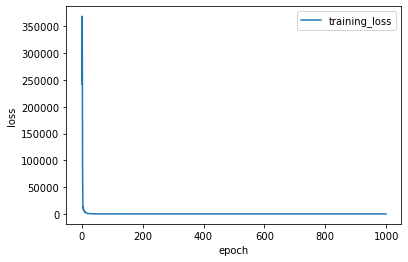

In [15]:
plt.plot(reg.loss_curve_, label='training_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

## 6.4. Model's Weight & Bias

In [16]:
for coef in reg.coefs_:
    print(coef.shape)

(4, 10)
(10, 1)


In [17]:
for intercept in reg.intercepts_:
    print(intercept.shape)

(10,)
(1,)


# 7. Prediction

## 7.1. Training Set

In [18]:
y_pred_train = reg.predict(X_train)

## 7.2. Test Set

In [19]:
y_pred_test = reg.predict(X_test)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Scoring

In [20]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 0.9976164560982469
mean_squared_error =		 32.85990204716202
mean_absolute_error =		 4.409727227819654
mean_absolute_percentage_error = 0.004628697682638209


### 8.1.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

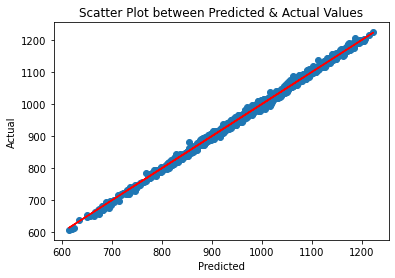

In [21]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 8.2. Test Set

### 8.2.1. Scoring

In [22]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 0.9919557724395083
mean_squared_error =		 64.93981701822763
mean_absolute_error =		 5.387244968356866
mean_absolute_percentage_error = 0.0059398638544876075


### 8.2.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

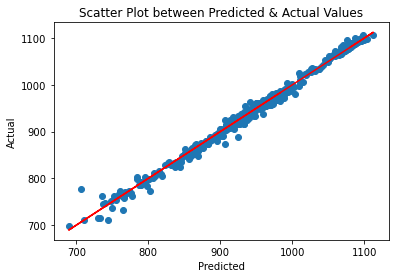

In [23]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### 8.2.3. Plot between Predicted & Actual Values (Zoom)

In [24]:
y_test = y_test.to_numpy()

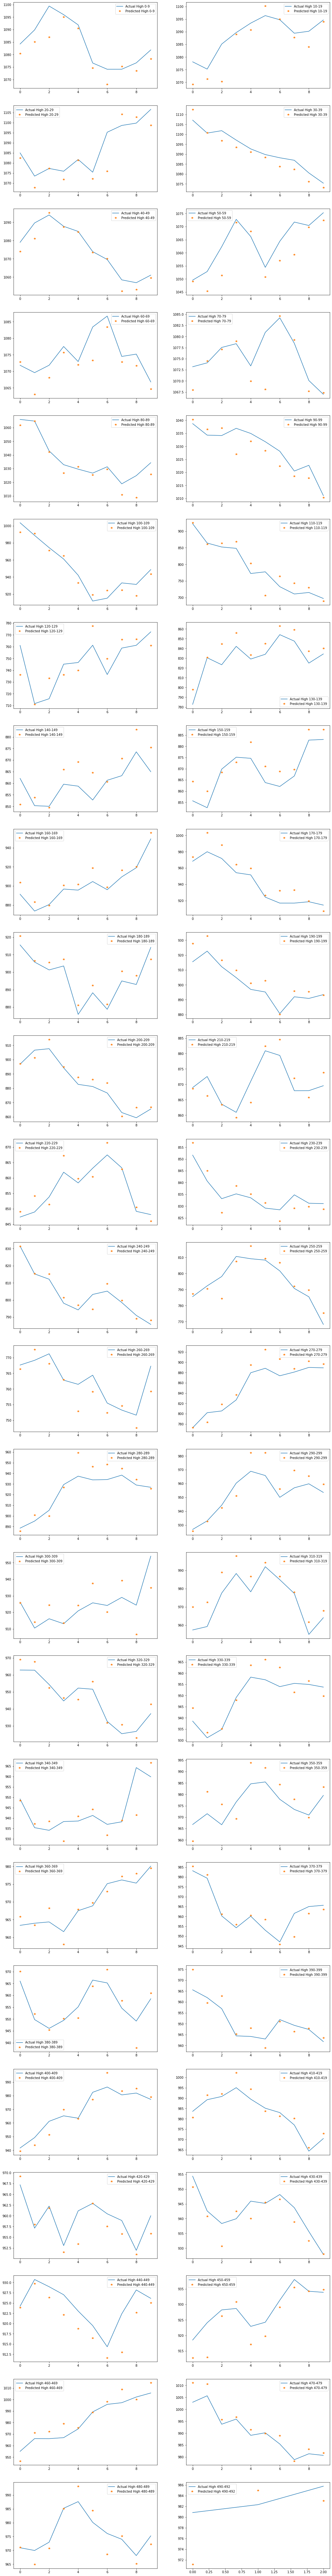

In [25]:
step = 10

import math
n_rows = int(math.ceil(len(y_test)/(2*step)))

fig = plt.figure(figsize=(18, 6*n_rows))

for i in range(0, len(y_test), step):
    start = i
    stop = min(i + step, len(y_test))
    plt.subplot(n_rows, 2, i//step + 1)
    plt.plot(y_test[start:stop], label=f'Actual High {start}-{stop-1}')
    plt.plot(y_pred_test[start:stop], '*', label=f'Predicted High {start}-{stop-1}')
    plt.legend()

# 9. Save Model

In [26]:
import pickle

In [27]:
pickle.dump((reg, feature_name), open('set50_model.pickle', 'wb'))